## `np.digitize()`

In [8]:
import numpy as np

In [9]:
rands = np.random.rand(20)
rands

array([0.23756752, 0.3496109 , 0.57659196, 0.1687269 , 0.08196488,
       0.79084271, 0.95468773, 0.49252782, 0.61216064, 0.26527687,
       0.29509178, 0.5114945 , 0.38381201, 0.4895047 , 0.60625166,
       0.36506762, 0.76391885, 0.6872961 , 0.64457986, 0.67710792])

In [10]:
hist = np.histogram(rands)

In [11]:
np.digitize(rands, hist[1])

array([ 2,  4,  6,  1,  1,  9, 11,  5,  7,  3,  3,  5,  4,  5,  7,  4,  8,
        7,  7,  7])

## Feature Selection

In [15]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFromModel

## Partial Correlation

Suppose we have a multiple linear regression of $y$ on $x_1$, $x_2$, $x_3$, and $x_4$. [This page](https://www.real-statistics.com/time-series-analysis/stochastic-processes/partial-autocorrelation-function/) tells us that the partial correlation between $y$ and $x_1$ can be calculated as "the correlation between the residuals of the regression of $y$ on $x_2$, $x_3$, and $x_4$ with the residuals of $x_1$ on $x_2$, $x_3$, and $x_4$". Let's see if we can verify this.

In [18]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
from scipy import stats

In [2]:
X, y = make_regression(n_features=4, random_state=42)

In [3]:
x1 = X[:, 0]
x_rest = X[:, 1:]
lr = LinearRegression().fit(x_rest, y)

In [4]:
y_resids = lr.predict(x_rest) - y

In [5]:
lrx = LinearRegression().fit(x_rest, x1)

In [6]:
x_resids = lrx.predict(x_rest) - x1

In [9]:
np.corrcoef(y, x1)[0, 1]

0.02459928220307856

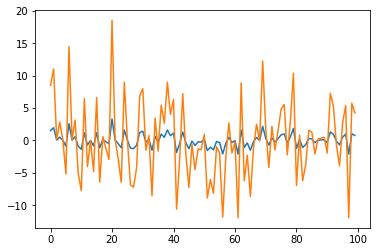

In [10]:
fig, ax = plt.subplots()
xx = np.arange(100)
ax.plot(xx, x_resids)
ax.plot(xx, y_resids);

In [11]:
np.corrcoef(y_resids, x_resids)[0, 1]

1.0

In [12]:
np.cov(y, lrx.predict(x_rest))[0, 1] /\
np.sqrt(np.var(lr.predict(x_rest))*np.var(lrx.predict(x_rest)))

-0.7055812322337391

### Second Example

In [13]:
X = np.array([2, 4, 15, 20])
Y = np.array([1, 2, 3, 4])
Z = np.array([0, 0, 1, 1]).reshape(-1, 1)

In [14]:
lr = LinearRegression().fit(Z, X)

In [15]:
lr2 = LinearRegression().fit(Z, Y)

In [16]:
XResids = lr.predict(Z) - X
YResids = lr2.predict(Z) - Y

In [17]:
np.corrcoef(XResids, YResids)[0, 1]

0.9191450300180579

### Third Example

In [19]:
dist = stats.norm()

fake_time = dist.rvs(100)

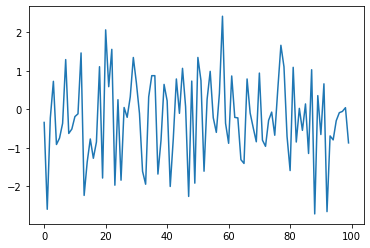

In [23]:
fig, ax = plt.subplots()

x_ax = np.arange(100)
ax.plot(x_ax, fake_time);

In [53]:
pacf(fake_time, nlags=4, method='ols-adjusted')

array([ 1.        , -0.14575655, -0.08296807, -0.19901497,  0.06643786])

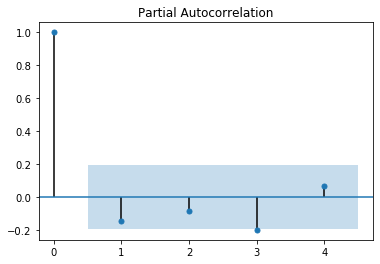

In [60]:
plot_pacf(fake_time, method='ols-adjusted', lags=4);

In [37]:
series = pd.Series(fake_time)

In [44]:
Z = np.hstack([series.shift(j).values.reshape(-1, 1) for j in range(2, 5)])

In [46]:
lry = LinearRegression().fit(Z[4:, :], series[4:])

In [47]:
lrx = LinearRegression().fit(Z[4:, :], series.shift()[4:])

In [48]:
y_resids = lry.predict(Z[4:, :]) - series[4:]
x_resids = lrx.predict(Z[4:, :]) - series.shift()[4:]

In [50]:
np.corrcoef(y_resids, x_resids)[0, 1]

-0.16554485905392927

### Fourth Example

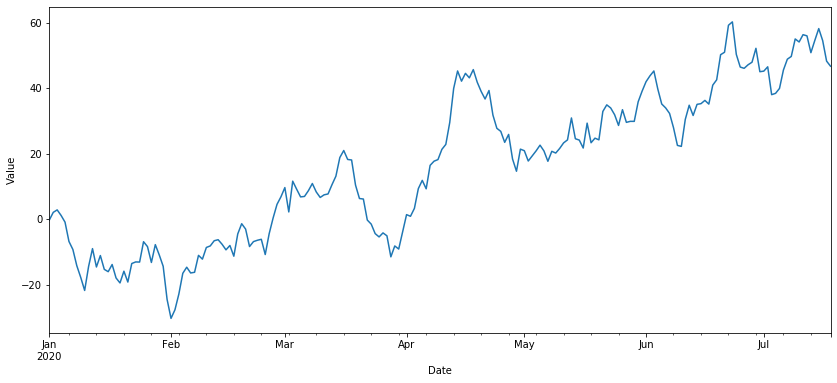

In [30]:
avg = 0
std = 4
n_pts = 200

# Dates & white noise (epsilon)
date_vals = pd.date_range(start='1/1/2020', periods=n_pts)
epsilon = np.random.normal(avg, std, n_pts)

# Generate data starting at y0 & "walk" based on epsilon (white noise model)
y0 = 0
vals = y0 + np.cumsum(epsilon) 
time_series = pd.Series(vals, index=date_vals)

# Plot out the model
ax = time_series.plot(figsize=(14, 6))
ax.set_ylabel("Value")
ax.set_xlabel("Date")
plt.show()

In [33]:
pacf(time_series, nlags=10)

array([ 1.        ,  0.98401318, -0.08565679, -0.10621459, -0.07232637,
        0.01019665, -0.00654946, -0.03380922,  0.14000464, -0.11083363,
       -0.17855616])

## Covariance = Correlation

In [69]:
data = np.array([(2, 6), (2, 6), (4, 8), (4, 8), (3, 7)])

In [70]:
np.corrcoef(data[:, 0], data[:, 1])

array([[1., 1.],
       [1., 1.]])

In [71]:
np.cov(data[:, 0], data[:, 1])

array([[1., 1.],
       [1., 1.]])

## Mechanics

In [377]:
def position(t, x_0=0, v_0=0, a=-9.8):
    return x_0 + v_0 * t + 0.5 * a * t**2

In [379]:
position(1, x_0=100)

95.1

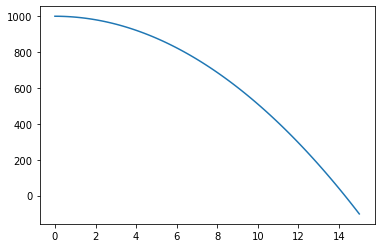

In [387]:
t = np.linspace(0, 15, 100)

plt.plot(t, position(t, x_0=1000));

## `pd.cut()`

In [9]:
df = pd.DataFrame(np.random.rand(10, 1), columns=['test'])
df

,test
0,0.956246
1,0.186059
2,0.416506
3,0.734815
4,0.848489
5,0.446202
6,0.892041
7,0.625035
8,0.446300
9,0.054496


In [10]:
pd.cut(df['test'], bins=3, labels=['low', 'medium', 'big'])

0       big
1       low
2    medium
3       big
4       big
5    medium
6       big
7    medium
8    medium
9       low
Name: test, dtype: category
Categories (3, object): ['low' < 'medium' < 'big']

In [11]:
data = [0, 0.4, 0.2, 2, 4, 4.1, 3.9]

In [18]:
pd.cut(pd.DataFrame(data)[0], bins=3)

0    (-0.0041, 1.367]
1    (-0.0041, 1.367]
2    (-0.0041, 1.367]
3      (1.367, 2.733]
4        (2.733, 4.1]
5        (2.733, 4.1]
6        (2.733, 4.1]
Name: 0, dtype: category
Categories (3, interval[float64]): [(-0.0041, 1.367] < (1.367, 2.733] < (2.733, 4.1]]

In [24]:
print(4.1 / 3, 4.1 / (3/2))

1.3666666666666665 2.733333333333333


In [27]:
print(np.percentile(a=data, q=33), np.percentile(a=data, q=67))

0.396 3.902


## Matrix Multiplication

$\begin{equation}
\begin{bmatrix}
a_{11} & ... & a_{1n} \\
. & . &  . \\
. &  . & . \\
. & . & . \\
a_{m1} & ... & a_{mn}
\end{bmatrix}
\begin{bmatrix}
b_{11} & ... & b_{1p} \\
. & . & . \\
. & . & . \\
. & . & . \\
b_{n1} & ... & b_{np}\end{bmatrix}
=
\begin{bmatrix}
\vec{a_{1j}}\cdot\vec{b_{k1}} & ... & \vec{a_{1j}}\cdot\vec{b_{kp}} \\
. & . & . \\
. & . & . \\
. & . & . \\
\vec{a_{mj}}\cdot\vec{b_{k1}} & ... & \vec{a_{mj}}\cdot\vec{b_{kp}}
\end{bmatrix}
\end{equation}$

$\hat{y} = X\vec{\beta}$

## `scipy.stats.norm.fit()`

In [28]:
from scipy import stats

In [35]:
stats.norm.fit(8)

(8.0, 0.0)

In [31]:
stats.norm.fit((8, 4))

(6.0, 2.0)

In [37]:
stats.norm.fit((8, 4, 9, 0, 9))

(6.0, 3.521363372331802)

In [38]:
data = (8, 4, 9, 0, 9)
np.std(data)

3.521363372331802

## More Tools in `sklearn.model_selection`

In [62]:
from sklearn.model_selection import LeaveOneOut, ShuffleSplit, GroupKFold, cross_val_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

In [48]:
X, y = make_classification()

In [49]:
LeaveOneOut().get_n_splits(X)

100

In [55]:
logreg = LogisticRegression()

In [56]:
cross_val_score(logreg, X, y)

array([0.85, 0.85, 0.95, 1.  , 0.85])

In [57]:
loo = LeaveOneOut()
cross_val_score(logreg, X, y, cv=loo)

array([1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [59]:
ss = ShuffleSplit(train_size=0.5, test_size=0.3)
cross_val_score(logreg, X, y, cv=ss)

array([0.9       , 0.86666667, 0.9       , 0.96666667, 0.83333333,
       0.8       , 0.96666667, 0.9       , 0.9       , 0.86666667])

In [77]:
gkf = GroupKFold()
cross_val_score(logreg, X, y, cv=gkf, groups=np.round([j/10 for j in range(1, 101)]))

array([0.95      , 0.85      , 0.8       , 0.95454545, 0.83333333])

## Heatmap of `GridSearchCV().cv_results_`

## F-Statistic

$\large F=\frac{\sum^K_{i=1}n_i(\bar{Y}_i-\bar{Y})^2}{\sum^K_{i=1}\sum^{n_i}_{j=1}(Y_{ij}-\bar{Y}_i)^2}\frac{N-K}{K-1}$

## New Time Series Lecture Dataset

In [84]:
sales = pd.read_csv('/Users/gdamico/Downloads/Historical_Data.csv')
sales.sample(20)

,Date,Article_ID,Country_Code,Sold_Units
3981,20181002,3446,SE,1
3281,20170601,332,SE,1
335,20170815,3417,AT,1
4538,20181019,4139,SE,4
2158,20181208,362,FR,2
3424,20181025,332,SE,3
659,20180331,3576,AT,1
2662,20181102,1516,FR,1
2172,20181222,362,FR,1
2638,20180930,1516,FR,13


## Triangles

In [106]:
def draw_triangles(n_tri=1):
    import numpy as np
    from matplotlib import pyplot as plt
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Set starting points
    a = 3
    b = 4
    
    # Draw first triangle
    ax.plot([0, a], [0, 0])
    ax.plot([a, a], [0, b])
    ax.plot([0, a], [0, b])
    
    last = [a, b]
    out = [a, b, int(np.sqrt(last[0]**2+last[1]**2))]
    
    # Draw the rest
    for _ in range(n_tri-1):
        next_leg = (last[0]**2+last[1]**2) // 2
        theta = np.arctan(-last[0] / last[1])
        next_x = last[0] + next_leg * np.cos(theta)
        next_y = last[1] + next_leg * np.sin(theta)
        
        ax.plot([last[0], next_x], [last[1], next_y])
        ax.plot([0, next_x], [0, next_y])
        max_ = np.max([next_x, next_y])
        
        last = [next_x, next_y]
        out.extend([int(next_leg), int(np.sqrt(out[-1]**2+next_leg**2))])
        
    return out

[3, 4, 5]

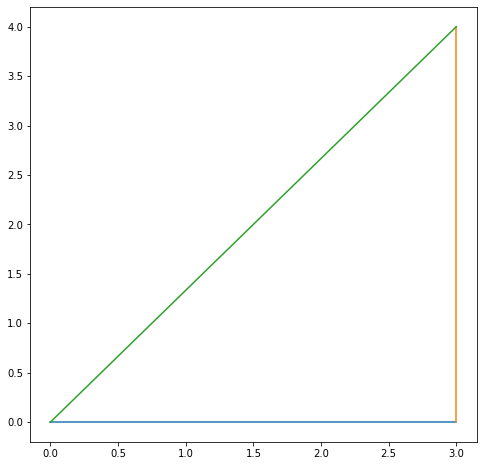

In [107]:
draw_triangles()

[3, 4, 5, 12, 13]

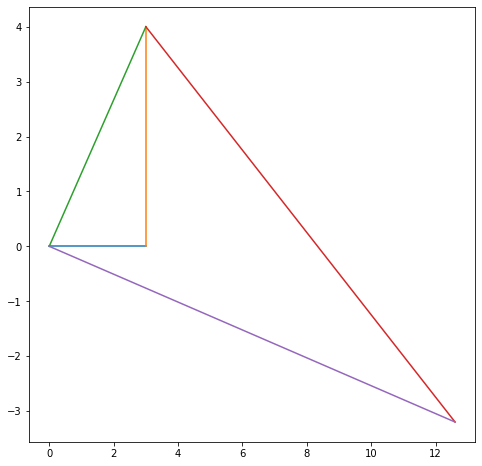

In [108]:
draw_triangles(2)

[3, 4, 5, 12, 13, 84, 85]

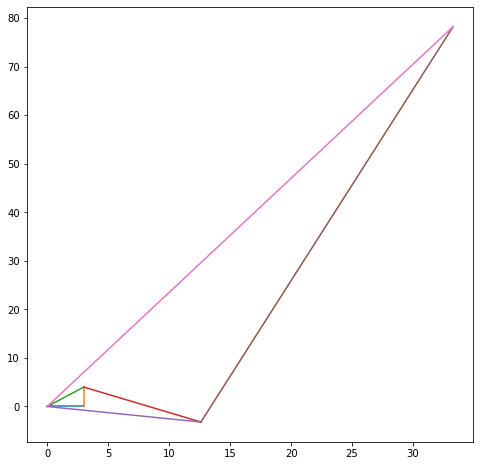

In [109]:
draw_triangles(3)

[3, 4, 5, 12, 13, 84, 85, 3612, 3613]

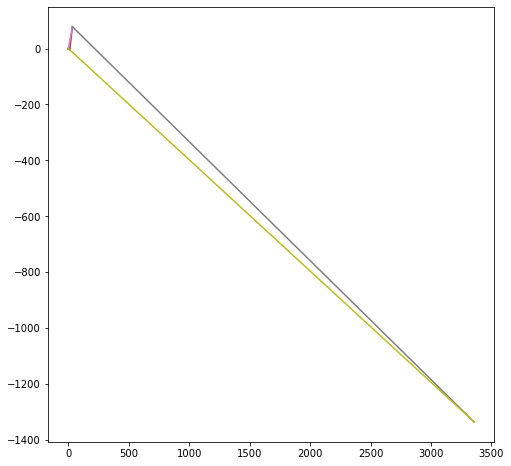

In [110]:
draw_triangles(4)

## $A^{-1} = \frac{C^T}{|A|}$ where C Is Cofactor Matrix

In [130]:
np.random.seed(42)
A = np.random.rand(3, 3)

In [131]:
det_A = np.linalg.det(A)

In [132]:
A

array([[0.37454012, 0.95071431, 0.73199394],
       [0.59865848, 0.15601864, 0.15599452],
       [0.05808361, 0.86617615, 0.60111501]])

In [135]:
cofactors = np.zeros((3, 3))

In [153]:
cofactors[0, 0] = np.linalg.det(A[1:, 1:])
cofactors[0, 1] = -np.linalg.det(np.hstack((A[1:, 0], A[1:, 2])).reshape(2, 2).T)
cofactors[0, 2] = np.linalg.det(A[:2, :2])
cofactors[1, 0] = -np.linalg.det(np.vstack((A[0, 1:], A[2, 1:])).reshape(2, 2))
cofactors[1, 1] = np.linalg.det(np.array([A[0, 0], A[0, 2], A[2, 0], A[2, 2]]).reshape(2, 2))
cofactors[1, 2] = -np.linalg.det(np.vstack((A[0, :2], A[2, :2])).reshape(2, 2))
cofactors[2, 0] = np.linalg.det(A[:2, 1:])
cofactors[2, 1] = -np.linalg.det(np.hstack((A[:2, 0], A[:2, 2])).reshape(2, 2).T)
cofactors[2, 2] = np.linalg.det(A[:2, :2])

In [154]:
cofactors

array([[-0.04133359, -0.35080188, -0.51071795],
       [ 0.06254705,  0.18262484, -0.2691968 ],
       [ 0.03410152,  0.37978818, -0.51071795]])

In [157]:
cofactors.T / det_A

array([[ -1.72626243,   2.61222492,   1.42422141],
       [-14.65094529,   7.62717264,  15.86153376],
       [-21.32970539, -11.24277772, -21.32970539]])

In [158]:
np.linalg.inv(A)

array([[ -1.72626243,   2.61222492,   1.42422141],
       [-14.65094529,   7.62717264,  15.86153376],
       [ 21.2780693 , -11.24277772, -21.32970539]])

## Pythagorean Triples

In [199]:
def find_pyth_trips(a, just_num=False):
    """This function returns all Pythagorean Triples
    [a, b, c] (where b > a) for given a. The return is
    in the form of a Pandas DataFrame. If only a count
    of the number of such triples is desire, set the
    just_num parameter to True."""
    
    import numpy as np
    import pandas as pd
    
    prod = a**2
    max_ = int(a * (np.sqrt(2) - 1))
    if just_num:
        ctr = 0
    else:
        out = []
    if a % 2 == 1:
        if max_ % 2 == 0:
            max_ -= 1
        for num in np.arange(int(max_), 0, -2):
            if prod / num == int(prod / num):
                if just_num:
                    ctr += 1
                else:
                    b = (prod // num - num) // 2
                    c = (prod // num + num) // 2
                    out.append([a, b, c])
    else:
        if max_ % 2 == 1:
            max_ -= 1
        for num in np.arange(int(max_), 1, -2):
            if prod / num == int(prod / num) and prod / num % 2 == 0:
                if just_num:
                    ctr += 1
                else:
                    b = (prod // num - num) // 2
                    c = (prod // num + num) // 2
                    out.append([a, b, c])
    if just_num:
        return ctr
    else:
        return pd.DataFrame(out, columns=['a', 'b', 'c'])

In [200]:
find_pyth_trips(3)

,a,b,c
0,3,4,5


In [201]:
find_pyth_trips(20)

,a,b,c
0,20,21,29
1,20,48,52
2,20,99,101


In [202]:
find_pyth_trips(2520)

,a,b,c
0,2520,2646,3654
1,2520,2750,3730
2,2520,3078,3978
3,2520,3159,4041
4,2520,3243,4107
...,...,...,...
80,2520,317515,317525
81,2520,396896,396904
82,2520,529197,529203
83,2520,793798,793802


In [203]:
find_pyth_trips(13568)

,a,b,c
0,13568,13575,19193
1,13568,20424,24520
2,13568,25440,28832
3,13568,43920,45968
4,13568,53424,55120
5,13568,89376,90400
6,13568,108120,108968
7,13568,179520,180032
8,13568,216876,217300
9,13568,359424,359680


In [204]:
find_pyth_trips(10080, just_num=True)

159

In [205]:
num_of_trips = {}
for a in range(1, 201):
    num_of_trips[a] = find_pyth_trips(a, just_num=True)

In [206]:
num_of_trips

{1: 0,
 2: 0,
 3: 1,
 4: 0,
 5: 1,
 6: 1,
 7: 1,
 8: 1,
 9: 2,
 10: 1,
 11: 1,
 12: 2,
 13: 1,
 14: 1,
 15: 3,
 16: 2,
 17: 1,
 18: 2,
 19: 1,
 20: 3,
 21: 3,
 22: 1,
 23: 1,
 24: 4,
 25: 2,
 26: 1,
 27: 3,
 28: 3,
 29: 1,
 30: 3,
 31: 1,
 32: 3,
 33: 4,
 34: 1,
 35: 3,
 36: 5,
 37: 1,
 38: 1,
 39: 4,
 40: 5,
 41: 1,
 42: 3,
 43: 1,
 44: 3,
 45: 5,
 46: 1,
 47: 1,
 48: 7,
 49: 2,
 50: 2,
 51: 4,
 52: 3,
 53: 1,
 54: 3,
 55: 3,
 56: 5,
 57: 4,
 58: 1,
 59: 1,
 60: 9,
 61: 1,
 62: 1,
 63: 5,
 64: 4,
 65: 4,
 66: 4,
 67: 1,
 68: 3,
 69: 4,
 70: 3,
 71: 1,
 72: 8,
 73: 1,
 74: 1,
 75: 6,
 76: 3,
 77: 3,
 78: 4,
 79: 1,
 80: 7,
 81: 4,
 82: 1,
 83: 1,
 84: 9,
 85: 4,
 86: 1,
 87: 4,
 88: 6,
 89: 1,
 90: 5,
 91: 3,
 92: 3,
 93: 4,
 94: 1,
 95: 4,
 96: 10,
 97: 1,
 98: 2,
 99: 6,
 100: 6,
 101: 1,
 102: 4,
 103: 1,
 104: 6,
 105: 9,
 106: 1,
 107: 1,
 108: 8,
 109: 1,
 110: 3,
 111: 4,
 112: 7,
 113: 1,
 114: 4,
 115: 4,
 116: 3,
 117: 6,
 118: 1,
 119: 4,
 120: 15,
 121: 2,
 122: 1,
 123: 4,

In [207]:
find_pyth_trips(180)

,a,b,c
0,180,189,261
1,180,240,300
2,180,273,327
3,180,299,349
4,180,385,425
5,180,432,468
6,180,525,555
7,180,663,687
8,180,800,820
9,180,891,909


In [247]:
find_pyth_trips(2520)

,a,b,c
0,2520,2646,3654
1,2520,2750,3730
2,2520,3078,3978
3,2520,3159,4041
4,2520,3243,4107
...,...,...,...
80,2520,317515,317525
81,2520,396896,396904
82,2520,529197,529203
83,2520,793798,793802


In [246]:
find_pyth_trips(23660)

,a,b,c
0,23660,23661,33461
1,23660,24843,34307
2,23660,26208,35308
3,23660,27456,36244
4,23660,28899,37349
5,23660,38025,44785
6,23660,40755,47125
7,23660,52377,57473
8,23660,54672,59572
9,23660,56784,61516


In [223]:
def triples_between_a_b(b, a=3):

    df = pd.DataFrame()
    for num in range(a, b+1):
        df = pd.concat([df, find_pyth_trips(num)])
    return df.reset_index(drop=True)

In [224]:
triples_between_a_b(20)

,a,b,c
0,3,4,5
1,5,12,13
2,6,8,10
3,7,24,25
4,8,15,17
5,9,12,15
6,9,40,41
7,10,24,26
8,11,60,61
9,12,16,20


In [226]:
trips_10000 = triples_between_a_b(10000)
trips_10000['ratio'] = (trips_10000['c'] - trips_10000['b']) / trips_10000['a']
trips_10000.sort_values('ratio', ascending=False).head(10)

,a,b,c,ratio
77522,8118,8120,11482,0.414141
33313,4059,4060,5741,0.414141
8804,1392,1394,1970,0.413793
20939,2784,2788,3940,0.413793
56610,6264,6273,8865,0.413793
88392,9048,9061,12805,0.413793
96618,9744,9758,13790,0.413793
3645,696,697,985,0.413793
27580,3480,3485,4925,0.413793
14643,2088,2091,2955,0.413793


In [227]:
trips_20000 = triples_between_a_b(20000, a=10001)
trips_20000['ratio'] = (trips_20000['c'] - trips_20000['b']) / trips_20000['a']
trips_20000.sort_values('ratio', ascending=False).head(10)

,a,b,c,ratio
26581,12177,12180,17223,0.414141
78568,16236,16240,22964,0.414141
44118,13568,13575,19193,0.414062
2437,10205,10212,14437,0.414013
117215,19135,19152,27073,0.413953
66533,15312,15334,21670,0.413793
13740,11136,11152,15760,0.413793
48573,13920,13940,19700,0.413793
57479,14616,14637,20685,0.413793
93988,17400,17425,24625,0.413793


In [229]:
trips_30000 = triples_between_a_b(30000, a=20001)

In [230]:
trips_30000['ratio'] = (trips_30000['c'] - trips_30000['b']) / trips_30000['a']
trips_30000.sort_values('ratio', ascending=False).head(10)

,a,b,c,ratio
50520,23660,23661,33461,0.414201
118309,28413,28420,40187,0.414141
60281,24354,24360,34446,0.414141
3941,20295,20300,28705,0.414141
99952,27136,27150,38386,0.414062
5543,20410,20424,28874,0.414013
121673,28644,28667,40525,0.413978
120060,28536,28577,40385,0.413793
80117,25752,25789,36445,0.413793
11927,20880,20910,29550,0.413793


In [231]:
trips_40000 = triples_between_a_b(40000, a=30001)

In [232]:
trips_40000['ratio'] = (trips_40000['c'] - trips_40000['b']) / trips_40000['a']
trips_40000.sort_values('ratio', ascending=False).head(10)

,a,b,c,ratio
96979,36531,36540,51669,0.414141
36227,32472,32480,45928,0.414141
8930,30615,30636,43311,0.414013
123289,38270,38304,54146,0.413953
12328,30849,30880,43649,0.413919
29524,32016,32062,45310,0.413793
91861,36192,36244,51220,0.413793
60495,34104,34153,48265,0.413793
39825,32712,32759,46295,0.413793
50145,33408,33456,47280,0.413793


In [233]:
trips_50000 = triples_between_a_b(50000, a=40001)

In [234]:
trips_50000['ratio'] = (trips_50000['c'] - trips_50000['b']) / trips_50000['a']
trips_50000.sort_values('ratio', ascending=False).head(10)

,a,b,c,ratio
113653,47320,47322,66922,0.414201
8976,40590,40600,57410,0.414141
135566,48708,48720,68892,0.414141
71870,44649,44660,63151,0.414141
41194,42676,42693,60365,0.414097
10729,40704,40725,57579,0.414062
12515,40820,40848,57748,0.414013
144871,49288,49335,69737,0.413934
82745,45347,45396,64165,0.413897
48501,43152,43214,61070,0.413793


In [239]:
trips_60000 = triples_between_a_b(60000, a=50001)

In [240]:
trips_60000['ratio'] = (trips_60000['c'] - trips_60000['b']) / trips_60000['a']
trips_60000.sort_values('ratio', ascending=False).head(10)

,a,b,c,ratio
153057,59496,59503,84145,0.414179
44057,52767,52780,74633,0.414141
109585,56826,56840,80374,0.414141
34790,52185,52208,73817,0.414085
68314,54272,54300,76772,0.414062
16238,51025,51060,72185,0.414013
117089,57288,57334,81050,0.413978
118970,57405,57456,81219,0.413953
79788,54984,55063,77815,0.413793
1668,50112,50184,70920,0.413793


In [241]:
trips_70000 = triples_between_a_b(70000, a=60001)
trips_70000['ratio'] = (trips_70000['c'] - trips_70000['b']) / trips_70000['a']
trips_70000.sort_values('ratio', ascending=False).head(10)

,a,b,c,ratio
81317,64944,64960,91856,0.414141
149027,69003,69020,97597,0.414141
14377,60885,60900,86115,0.414141
129527,67840,67875,95965,0.414062
119830,67260,67301,95149,0.414035
20084,61230,61272,86622,0.414013
27788,61698,61760,87298,0.413919
43123,62629,62700,88621,0.413882
77798,64728,64821,91605,0.413793
31863,61944,62033,87665,0.413793


In [242]:
trips_80000 = triples_between_a_b(80000, a=70001)
trips_80000['ratio'] = (trips_80000['c'] - trips_80000['b']) / trips_80000['a']
trips_80000.sort_values('ratio', ascending=False).head(10)

,a,b,c,ratio
16271,70980,70983,100383,0.414201
153986,79097,79104,111865,0.414188
51407,73062,73080,103338,0.414141
120325,77121,77140,109079,0.414141
10392,70623,70664,99905,0.414044
24042,71435,71484,101059,0.414013
110330,76540,76608,108292,0.413953
92691,75500,75579,106829,0.413907
75262,74472,74579,105395,0.413793
110627,76560,76670,108350,0.413793


In [243]:
trips_90000 = triples_between_a_b(90000, a=80001)
trips_90000['ratio'] = (trips_90000['c'] - trips_90000['b']) / trips_90000['a']
trips_90000.sort_values('ratio', ascending=False).head(10)

,a,b,c,ratio
20131,81180,81200,114820,0.414141
160590,89298,89320,126302,0.414141
90089,85239,85260,120561,0.414141
138361,88020,88051,124501,0.414110
92186,85352,85386,120730,0.414097
24189,81408,81450,115158,0.414062
28102,81640,81696,115496,0.414013
102157,85932,86001,121575,0.413978
46244,82695,82792,117017,0.413870
12655,80736,80852,114260,0.413793


In [244]:
trips_100000 = triples_between_a_b(100000, a=90001)
trips_100000['ratio'] = (trips_100000['c'] - trips_100000['b']) / trips_100000['a']
trips_100000.sort_values('ratio', ascending=False).head(10)

,a,b,c,ratio
81110,94640,94644,133844,0.414201
129977,97416,97440,137784,0.414141
58592,93357,93380,132043,0.414141
87040,94976,95025,134351,0.414062
32166,91845,91908,129933,0.414013
129928,97412,97485,137813,0.413994
99236,95675,95760,135365,0.413953
150610,98576,98670,139474,0.413934
44405,92547,92640,130947,0.413919
12025,90694,90792,128330,0.413897
